### Dataset Description:The data for the Consumer Airfare Report can be found at DOT's public data portal,
### data.transportation.gov which has data since 1996 to 2022 for Top 1,000 Contiguous State City-Pair Markets

In [2]:
# Final ML Project- @Apoorva Gangwar, @Nimisha Gupta, @ Parineeta Begrai, @Pranava Shree
# University - San JOse State University
# Data 245 - Machine Learning
# USA Flight Fare Prediction Project

## Stage 1: Business Understanding


In [1]:
## In the present day, the airline industry has evolved into being highly unpredictable with 
## its complex ticket pricing system.
## To help the consumers understand that because airline carriers tend to offer a variety of 
## prices in a market, carriers with higher average prices might offer some seats at prices 
## as lower than , carriers with much lower average prices.
## In short, fare comparisons between markets allow consumers to further evaluate prices.	

## Stage 2: Data Understanding 
### Data Loading


### Exploring Data Analysis 
## Shape of Data
## Data Types
### Data Redundancy
### Data Statistics
### Correlation among Attributes
### Data Distribution
### Cardinality of our dataset

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [3]:
df = pd.read_csv("F:\\MSDA\\Sem 2\\Data 245_MachineLearning_Friday\\Project\\Dataset\\Consumer_Airfare_Report__Table_1_-_Top_1_000_Contiguous_State_City-Pair_Markets.csv")
df

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.2900,131.05,FL,0.2900,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.6300,194.71,NJ,0.2600,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.5100,144.28,B6,0.1500,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.7400,224.77,TZ,0.1100,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.4700,262.43,AS,0.2700,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107027,2022,3,35412,30852,"Knoxville, TN","Washington, DC (Metropolitan Area)",465,252,245.38,AA,0.6721,240.35,AA,0.6721,240.35,-1,NaN,NaN
107028,2022,3,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",684,384,230.81,DL,0.5551,276.65,G4,0.2646,94.43,-1,NaN,NaN
107029,2022,3,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,240,164.47,G4,0.7399,92.94,G4,0.7399,92.94,-1,NaN,NaN
107030,2022,3,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,226,132.10,G4,0.8397,88.58,G4,0.8397,88.58,-1,NaN,NaN


### Data Loading 

In [4]:
# # making data frame 
# df = pd.read_csv("/Users/nimishagupta/Documents/DATA Analytics/Sem_2/DATA 245/Project/Consumer_Airfare_Report__Table_1_-_Top_1_000_Contiguous_State_City-Pair_Markets.csv")
# df

In [5]:
df.columns

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2'],
      dtype='object')

## Exploring Data Analysis 

In [6]:
df.head(5)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.29,131.05,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.63,194.71,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.51,144.28,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.74,224.77,TZ,0.11,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.47,262.43,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"


#### Find out which airlines is the busiest in Unites States

In [7]:
busy_airlines = df['carrier_lg'].value_counts().reset_index().set_index('index')
busy_airlines = busy_airlines.head()
busy_airlines

,carrier_lg
index,
WN,28803
DL,19150
AA,15224
UA,9852
US,8949


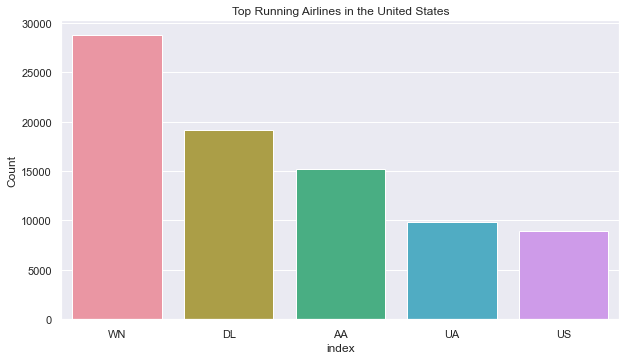

In [8]:
plt.figure(figsize=(10,5.5))
sns.barplot(x=busy_airlines.index, y=busy_airlines.carrier_lg)
plt.title('Top Running Airlines in the United States')
plt.ylabel('Count')
plt.show()

#### Count of running flights as per airlines(carrier)

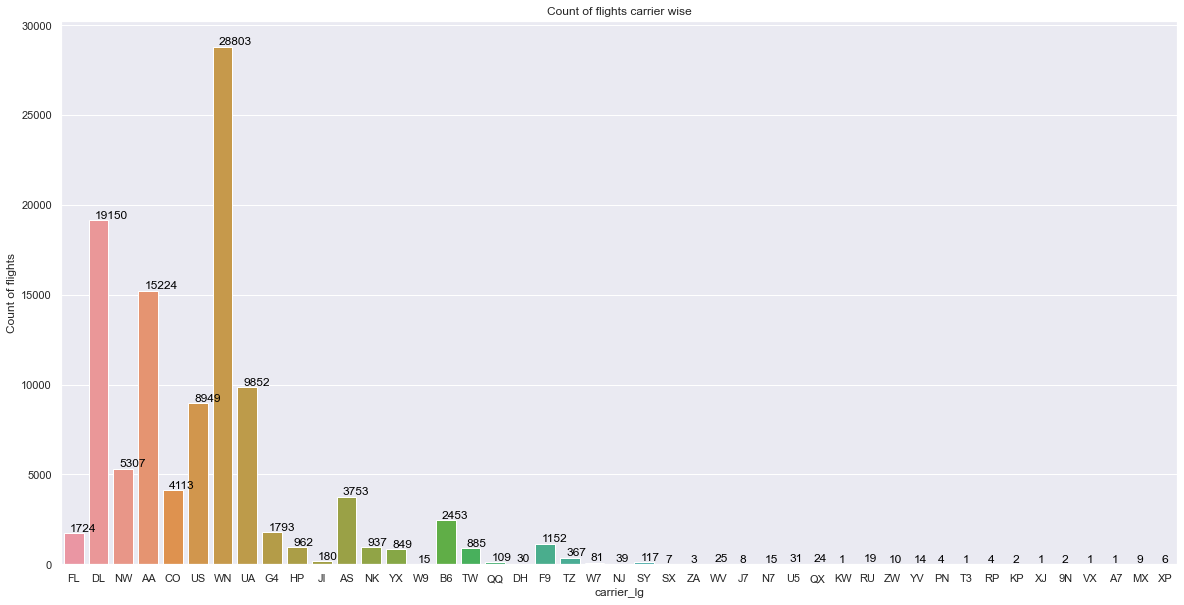

In [9]:
plt.figure(figsize = (20, 10))
plt.title('Count of flights carrier wise')
ax=sns.countplot(x = 'carrier_lg', data = df)
plt.xlabel('carrier_lg')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

#### Graph showcasing Price Vs Airlines

Text(0, 0.5, 'Price of ticket')

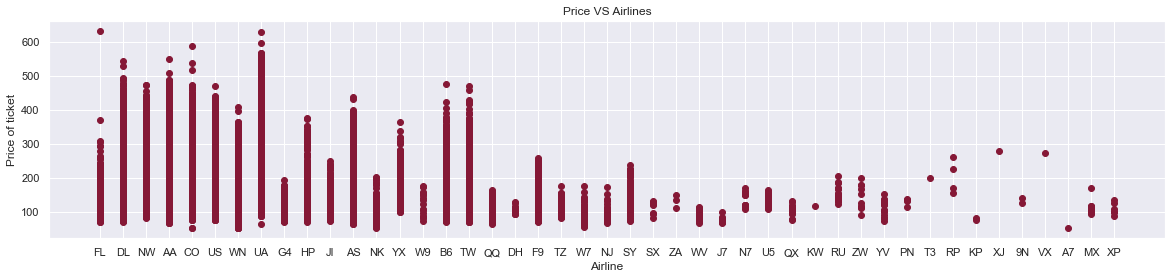

In [10]:
plt.figure(figsize = (20,4))
plt.title('Price VS Airlines')
plt.scatter(df['carrier_lg'], df['fare_lg'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
#plt.xticks(rotation = 90)

In [11]:
# #plot graph of feature importances for better visualization

# plt.figure(figsize = (12,8))
# feat_importances = pd.Series(selection.feature_importances_, index= df.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

####  Shape of Data

In [12]:
# Analysing the number of rows and columns in the dataset

In [13]:
df.shape

(107032, 18)

In [14]:
df.columns

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'table_1_flag', 'Geocoded_City1',
       'Geocoded_City2'],
      dtype='object')

### Data Types

In [15]:
df.dtypes

Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
table_1_flag        int64
Geocoded_City1     object
Geocoded_City2     object
dtype: object

In [16]:
# #changing citymarketid_1, passengers into int
# df["passengers"] = pd.to_numeric(df["passengers"].str.replace(',', ''))
# df["citymarketid_1"] = pd.to_numeric(df["citymarketid_1"].str.replace(',', ''))

In [17]:
df.dtypes

Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
table_1_flag        int64
Geocoded_City1     object
Geocoded_City2     object
dtype: object

In [18]:
###### Changing Data Type for columns having 'object' datatype
df["passengers"] = pd.to_numeric(df["passengers"].astype(str).replace(',', ''))
df["citymarketid_1"] = pd.to_numeric(df["citymarketid_1"].astype(str).replace(',', ''))


# Analytics Base Table Creation

## A data quality report for the US Flight Fare Prediction ABT

In [19]:
# # Define the features to include in the ABT
# features = ['Year', 'quarter', 'citymarketid_1', 'citymarketid_2',
#        'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
#        'carrier_low', 'lf_ms', 'fare_low' ]

# # Create a new DataFrame to store the ABT
# abt = pd.DataFrame(columns=['Feature', 'Count_Missing', 'Cardinality', 'Min', '1st Quartile', 
#                             'Mean', 'Median', '3rd Quartile', 'Max', 'Standard Deviation'])

# # Populate the ABT
# for feature in features:
#     # Count the number of missing values
#     count_missing = df[feature].isna().sum()
    
#     # Calculate the cardinality
#     #cardinality = len(df[feature].unique())
    
#     # Calculate the summary statistics
#     min_val = df[feature].min()
#     first_quartile = np.percentile(df[feature], 25)
#     mean_val = df[feature].mean()
#     median_val = df[feature].median()
#     third_quartile = np.percentile(df[feature], 75)
#     max_val = df[feature].max()
#     std_val = df[feature].std()
    
#     # Adding feature and summary statistics to the ABT
#     abt.loc[len(abt)] = [feature, count_missing, cardinality, min_val, first_quartile, 
#                          mean_val, median_val, third_quartile, max_val, std_val]

# # Print the ABT
# display(abt)

In [20]:
df.head(5)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.29,131.05,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.63,194.71,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.51,144.28,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.74,224.77,TZ,0.11,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.47,262.43,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"


## Data Redundancy 

In [21]:
# return False if there is no duplicate
duplicated_df = df. duplicated()

# count the number of duplicates
duplicated_df_replaced = duplicated_df.replace([False], 1)
duplicated_df_replaced = duplicated_df_replaced.replace([True], 0)
count_duplicated_df_replaced = duplicated_df_replaced.sum()
print("There are no duplicates because the count of False fetched from df.duplicated " + str(count_duplicated_df_replaced) + " is same as length of original dataframe: " + str(len(df)))

There are no duplicates because the count of False fetched from df.duplicated 107032 is same as length of original dataframe: 107032


### Data Statistics

In [22]:
# Give the statistical anaylyis of data
# percentile list 
perc =[.25,.75,] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
df.describe(percentiles = perc, include = include)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
count,107032.000000,107032.000000,107032.000000,107032.000000,107032,107032,107032.000000,107032.000000,107032.000000,107032,107032.000000,107032.000000,107029,107029.000000,107029.000000,107032.000000,96027,96027
unique,NaN,NaN,NaN,NaN,151,139,NaN,NaN,NaN,45,NaN,NaN,56,NaN,NaN,NaN,256,225
top,NaN,NaN,NaN,NaN,"Atlanta, GA (Metropolitan Area)","Washington, DC (Metropolitan Area)",NaN,NaN,NaN,WN,NaN,NaN,WN,NaN,NaN,NaN,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Washington, DC (Metropolitan Area)\n(38.892062..."
freq,NaN,NaN,NaN,NaN,6180,7270,NaN,NaN,NaN,28803,NaN,NaN,37292,NaN,NaN,NaN,5183,6119
mean,2008.878924,2.486014,31522.920052,32278.838366,NaN,NaN,1056.385389,800.085423,195.176300,NaN,0.555926,199.234834,NaN,0.323191,164.561848,0.626056,NaN,NaN
std,7.723192,1.113799,1216.852069,1384.020670,NaN,NaN,611.409043,1291.681122,61.422929,NaN,0.185678,70.751276,NaN,0.239679,56.573240,0.779782,NaN,NaN
min,1996.000000,1.000000,30135.000000,30158.000000,NaN,NaN,109.000000,28.000000,56.420000,NaN,0.020000,51.490000,NaN,0.010000,51.490000,-1.000000,NaN,NaN
25%,2002.000000,1.000000,30529.000000,30977.000000,NaN,NaN,585.000000,233.000000,150.810000,NaN,0.410000,147.797500,NaN,0.140000,121.600000,1.000000,NaN,NaN
50%,2009.000000,2.000000,31066.000000,32323.000000,NaN,NaN,928.000000,400.000000,189.400000,NaN,0.540000,191.090000,NaN,0.250000,158.030000,1.000000,NaN,NaN
75%,2016.000000,3.000000,32337.000000,33316.000000,NaN,NaN,1437.000000,813.000000,235.090000,NaN,0.680000,244.332500,NaN,0.460000,199.750000,1.000000,NaN,NaN


## Correlation among Attributes

In [23]:
df.corr()

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,table_1_flag
Year,1.000000,-0.021427,0.006285,0.001199,0.033826,0.042128,0.240345,0.004168,0.202448,0.030443,0.181965,-0.675021
quarter,-0.021427,1.000000,-0.004330,-0.005144,0.001366,0.014170,-0.030372,-0.014348,-0.026730,-0.010729,-0.014762,-0.005979
citymarketid_1,0.006285,-0.004330,1.000000,0.012471,0.093764,-0.019432,-0.012049,-0.061650,-0.029663,0.016339,0.009004,-0.005275
citymarketid_2,0.001199,-0.005144,0.012471,1.000000,0.032799,-0.098805,-0.018268,0.008379,-0.015166,-0.006407,-0.014421,-0.003529
nsmiles,0.033826,0.001366,0.093764,0.032799,1.000000,0.009943,0.536731,-0.476682,0.515516,-0.296895,0.465298,-0.014409
passengers,0.042128,0.014170,-0.019432,-0.098805,0.009943,1.000000,-0.066574,-0.150250,-0.025688,-0.083690,-0.082271,-0.007177
fare,0.240345,-0.030372,-0.012049,-0.018268,0.536731,-0.066574,1.000000,-0.191537,0.956775,-0.348656,0.847494,-0.095805
large_ms,0.004168,-0.014348,-0.061650,0.008379,-0.476682,-0.150250,-0.191537,1.000000,-0.184980,0.320338,-0.183442,-0.042848
fare_lg,0.202448,-0.026730,-0.029663,-0.015166,0.515516,-0.025688,0.956775,-0.184980,1.000000,-0.405217,0.770692,-0.080443
lf_ms,0.030443,-0.010729,0.016339,-0.006407,-0.296895,-0.083690,-0.348656,0.320338,-0.405217,1.000000,-0.103910,-0.012570


<AxesSubplot:>

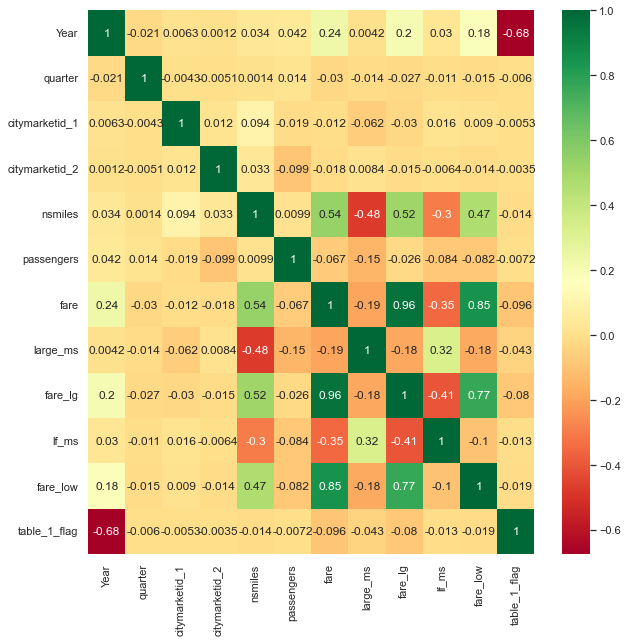

In [24]:
#### Correlation amongst features

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [25]:
## Insights

## From the above correlation matrix, we can observe that fare and fare_lg are correlated to each other 
## with correlation coefficient of 0.956791.
## Also, fare and fare_low are correlated with coefficient of 0.847484.

### Data Distribution

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'quarter'}>,
        <AxesSubplot:title={'center':'citymarketid_1'}>],
       [<AxesSubplot:title={'center':'citymarketid_2'}>,
        <AxesSubplot:title={'center':'nsmiles'}>,
        <AxesSubplot:title={'center':'passengers'}>],
       [<AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'large_ms'}>,
        <AxesSubplot:title={'center':'fare_lg'}>],
       [<AxesSubplot:title={'center':'lf_ms'}>,
        <AxesSubplot:title={'center':'fare_low'}>,
        <AxesSubplot:title={'center':'table_1_flag'}>]], dtype=object)

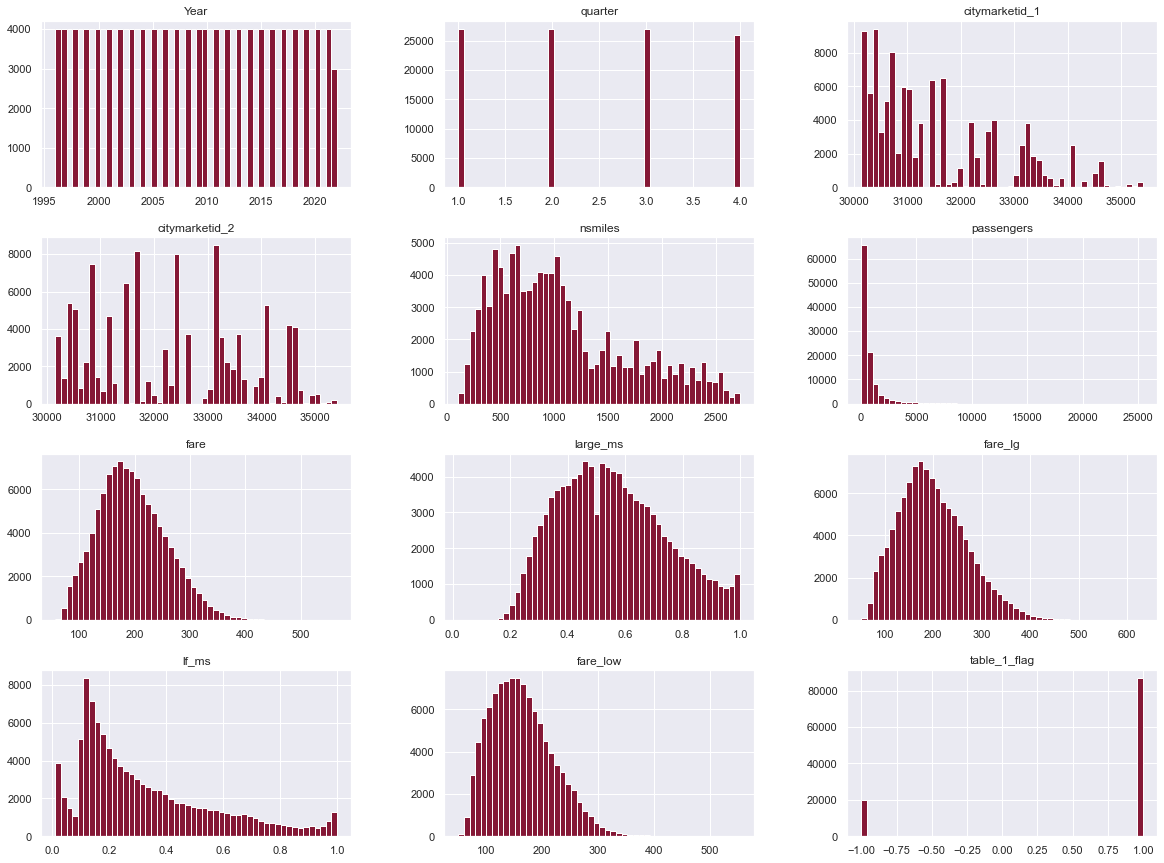

In [26]:
# feature distribution
df.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:title={'center':'Top 10 Citymarket'}>

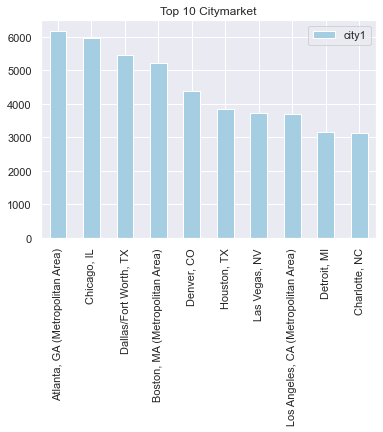

In [27]:
## Top 10 city markets have maximum number of flights running for city1
# plotting the categorical feature
df['city1'].value_counts()[:10].plot(kind='bar', colormap='Paired', legend=True, title='Top 10 Citymarket') 

#### Cardinality of our dataset 

In [28]:
# the new cardinalty looks good 
for col in df:
    cardinality = len(pd.Index(df[col]).value_counts())
    print(df[col].name + ": " + str(cardinality))

Year: 27
quarter: 4
citymarketid_1: 151
citymarketid_2: 139
city1: 151
city2: 139
nsmiles: 1372
passengers: 5895
fare: 25863
carrier_lg: 45
large_ms: 7002
fare_lg: 28560
carrier_low: 56
lf_ms: 8055
fare_low: 23365
table_1_flag: 2
Geocoded_City1: 256
Geocoded_City2: 225


## Stage 3: Data Preparation

### Data Cleaning
### Checking Null Values 
### Data Transformation 
### Drop column which is not adding any information gain to the data
### Data Standardization
### One Hot Encoding
### PCA

## Data Cleaning
## Checking Null Values 

In [29]:
def getMissingPercentForColumn(dataFrame, columnName):
    null_sum_of_columns_df = dataFrame.isnull().sum()
    count_col_null = null_sum_of_columns_df[columnName]
    missing_percent = round((count_col_null / len(dataFrame))*100, 4)
    return missing_percent

In [30]:
getMissingPercentForColumn(df, 'Geocoded_City1')

10.282

In [31]:
## Missing values percentage came out to around 10.282%
## There are 11005 NaN values for Geocoded_City1 and Geocoded_City2

## Data Transformation 

In [32]:
## Work on missing values of Geocoded_City1 and Geocoded_City2

In [33]:
citycodes_df1  = df[['city1', 'Geocoded_City1']]
citycodes_df1.rename(columns={'city1': 'city', 'Geocoded_City1': 'Geocoded_City'}, inplace=True)
citycodes_df2  = df[['city2', 'Geocoded_City2']]
citycodes_df2.rename(columns={'city2': 'city', 'Geocoded_City2': 'Geocoded_City'}, inplace=True)
citycodes_df = pd.concat([citycodes_df1, citycodes_df2])
# citycodes_df consists of city name and geocoded city value for both city1 and city2 
citycodes_dedup = citycodes_df.drop_duplicates(ignore_index=False)
print(citycodes_dedup)

                                      city  \
0            Miami, FL (Metropolitan Area)   
1          Atlanta, GA (Metropolitan Area)   
2      Los Angeles, CA (Metropolitan Area)   
3                         Indianapolis, IN   
4                    Dallas/Fort Worth, TX   
...                                    ...   
95484                   Montrose/Delta, CO   
95498                Steamboat Springs, CO   
95658                        St. Cloud, MN   
95667                         Rockford, IL   
96372                      Springfield, IL   

                                           Geocoded_City  
0      Miami, FL (Metropolitan Area)\n(44.977479, -93...  
1      Atlanta, GA (Metropolitan Area)\n(33.748547, -...  
2      Los Angeles, CA (Metropolitan Area)\n(34.05223...  
3               Indianapolis, IN\n(39.76845, -86.156212)  
4          Dallas/Fort Worth, TX\n(40.11086, -77.035636)  
...                                                  ...  
95484                             

C:\Users\Hp\AppData\Local\Temp\ipykernel_18032\3960757332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citycodes_df1.rename(columns={'city1': 'city', 'Geocoded_City1': 'Geocoded_City'}, inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18032\3960757332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citycodes_df2.rename(columns={'city2': 'city', 'Geocoded_City2': 'Geocoded_City'}, inplace=True)


In [34]:
citycodes_dedup[citycodes_dedup['city'] == 'Santa Rosa, CA']

,city,Geocoded_City
106997,"Santa Rosa, CA",NaN
3767,"Santa Rosa, CA","Santa Rosa, CA\n(38.439698, -122.715642)"
90141,"Santa Rosa, CA","(38.439698, -122.715642)"


In [35]:
# notnull() - Detect non-missing values for an array-like object.
dedup_cities = citycodes_dedup[citycodes_dedup['Geocoded_City'].notnull()]
dedup_cities

,city,Geocoded_City
0,"Miami, FL (Metropolitan Area)","Miami, FL (Metropolitan Area)\n(44.977479, -93..."
1,"Atlanta, GA (Metropolitan Area)","Atlanta, GA (Metropolitan Area)\n(33.748547, -..."
2,"Los Angeles, CA (Metropolitan Area)","Los Angeles, CA (Metropolitan Area)\n(34.05223..."
3,"Indianapolis, IN","Indianapolis, IN\n(39.76845, -86.156212)"
4,"Dallas/Fort Worth, TX","Dallas/Fort Worth, TX\n(40.11086, -77.035636)"
...,...,...
90063,"Stockton, CA","(37.957541, -121.292451)"
90141,"Santa Rosa, CA","(38.439698, -122.715642)"
90395,"Rapid City, SD","(44.082995, -103.224443)"
90980,"Tallahassee, FL","(38.921902, -120.020798)"


In [36]:
## Working on missing values of Geocoded_City1 & Geocoded_City2 and filling 
## with the help of values elsewhere in the dataset

city_dict = zip(dedup_cities.city, dedup_cities.Geocoded_City)
city_dict = list(city_dict)
city_dict = dict(city_dict)
city_dict

{'Miami, FL (Metropolitan Area)': '(44.977479, -93.264346)',
 'Atlanta, GA (Metropolitan Area)': '(33.748547, -84.391502)',
 'Los Angeles, CA (Metropolitan Area)': '(34.052238, -118.243344)',
 'Indianapolis, IN': '(39.76845, -86.156212)',
 'Dallas/Fort Worth, TX': '(40.11086, -77.035636)',
 'Dayton, OH': '(39.760982, -84.192203)',
 'Charlotte, NC': '(35.222936, -80.840161)',
 'Las Vegas, NV': '(36.169202, -115.140597)',
 'Charleston, SC': '(32.77647, -79.931027)',
 'San Antonio, TX': '(29.425173, -98.494599)',
 'Greensboro/High Point, NC': '(36.072701, -79.793899)',
 'Louisville, KY': '(38.256078, -85.751569)',
 'Salt Lake City, UT': '(40.758478, -111.888142)',
 'Cleveland, OH (Metropolitan Area)': '(41.505546, -81.6915)',
 'Austin, TX': '(30.264979, -97.746598)',
 'El Paso, TX': '(31.76006, -106.492257)',
 'Chicago, IL': '(41.775002, -87.696388)',
 'Little Rock, AR': '(34.748745, -92.275105)',
 'Minneapolis/St. Paul, MN': '(44.977479, -93.264346)',
 'Houston, TX': '(29.760803, -95.369

In [37]:
## Getting the latitude, longitude for these cities from internet because they were not available in the dataset

city_dict['Traverse City, MI'] = '(44.76306, -85.62063)'
city_dict['Montrose/Delta, CO'] = '(38.478321, -107.876175)'
city_dict['St. Cloud, MN'] = '(45.560230, -94.172852)'
city_dict['Springfield, IL'] = '(39.799999, -89.650002)'
city_dict['New Haven, CT'] = '(41.310726, -72.929916)'
city_dict['Ashland, WV'] = '(40.86867, -82.31822)'
city_dict['Charlottesville, VA'] = '(38.033554, -78.507980)'
city_dict['Hilton Head, SC'] = '(32.178890, -80.7430573)'

In [38]:
for index, row in df.iterrows():
    if(pd.isnull(row['Geocoded_City1'])):
        print(row['Geocoded_City1'])
        if(row['city1'] in city_dict):
            df.at[index,'Geocoded_City1'] = city_dict[row['city1']]
            print("Changing Value for : ", row['city1'])

df

nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Amarillo, TX
nan
Changing Value for :  Allentown/Bethlehem/Easton, PA
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Atlantic City, NJ
nan
Changing Value for :  Atlantic City, NJ
nan
Changing Value for :  Atlanti

nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value

nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, M

nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Ka

nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Austin, TX
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Austin, TX
nan
Changing Value for :  Colorado Springs, CO
nan
Changing Value for :  Colorado Springs, CO
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Al

Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Corpus Christi, TX
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, 

Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Huntsville, AL
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Amarillo, TX
nan
Changing Value for :  Amarillo, TX
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO


nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Bosto

Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Val

nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Wo

Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Charleston, SC
nan
Changing Value for :  Charleston, SC
nan
Changi

Changing Value for :  Fort Wayne, IN
nan
Changing Value for :  Greenville/Spartanburg, SC
nan
Changing Value for :  Greenville/Spartanburg, SC
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Greensboro/High Point, NC
nan
Changing Value for :  Harrisburg, PA
nan
Changing Value for :  Harlingen/San Benito, TX
nan
Changing Value for :  Harlingen/San Benito, TX
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas

nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Valu

nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA 

nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Albany, NY
nan
Changing Value for :  Allentown/Bethlehem/Easton, PA
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Atlantic City, NJ
nan
Changing Value for :  Colorado Springs, CO
nan
Changing Value for :  Colorado Springs, CO
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Va

nan
Changing Value for :  Asheville, NC
nan
Changing Value for :  Tucson, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan


Changing Value for :  Orlando, FL
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Valparaiso, FL
nan
Changing Value for :  Eugene, OR
nan
Changing Value for :  Eugene, OR
nan
Changing Value for :  Key West, FL
nan
Changing Value for :  Fargo, ND
nan
Changing Value for :  Fresno, CA
nan
Changing Value for :  Fresno, CA
nan
Changing Value for :  Fresno, CA
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Min

Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Little Rock, AR
nan
Changing Value for :  Little Rock, AR
nan
Changing Value for :  Little Rock, AR
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Cincinnati, OH
nan
Changing Va

Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Fort Wayne, IN
nan
Changing Value for :  Fort Wayne, IN
nan
Changing Value for :  Greenville/Spartanburg, SC
nan
Changing Value for :  Greenville/Spartanburg, SC
nan
Changing Value for :  Greenville/Spartanburg, SC
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Harrisburg, PA
nan
Changing Value for :  Hilton Head, SC
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Val

Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Allentown/Bethlehem/Easton, PA
nan
Changing Value for :  Allentown/Bethlehem/Easton, PA
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Albuquerque, NM
nan
Changing Value for :  Nantucket, MA
nan
Changing Value

nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boise, ID
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Cha

nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Val

nan
Changing Value for :  Bend/Redmond, OR
nan
Changing Value for :  Bend/Redmond, OR
nan
Changing Value for :  Bend/Redmond, OR
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Rochester, NY
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Val

Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value

nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Housto

nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :

nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan


nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Myrtle Beach, SC
nan
Changing Value for :  Myrtle Beach, SC
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detro

Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Las Vegas, NV
nan


nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Atl

Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, M

Changing Value for :  Eugene, OR
nan
Changing Value for :  Eugene, OR
nan
Changing Value for :  Eugene, OR
nan
Changing Value for :  Eugene, OR
nan
Changing Value for :  Key West, FL
nan
Changing Value for :  Fargo, ND
nan
Changing Value for :  Fresno, CA
nan
Changing Value for :  Fresno, CA
nan
Changing Value for :  Fresno, CA
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Cha

Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Madison, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  

Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Boston, M

Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Des Moines, IA
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Houston, T

nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Savannah, GA
nan
Changing Value for :  Santa Barbara, CA
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  Syracuse, NY
nan
Changing Value for :  Syracuse, NY
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN
nan
Changing Value for :  Knoxville, TN


,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.2900,131.05,FL,0.2900,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.6300,194.71,NJ,0.2600,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.5100,144.28,B6,0.1500,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.7400,224.77,TZ,0.1100,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.4700,262.43,AS,0.2700,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107027,2022,3,35412,30852,"Knoxville, TN","Washington, DC (Metropolitan Area)",465,252,245.38,AA,0.6721,240.35,AA,0.6721,240.35,-1,"(35.962631, -83.916677)",NaN
107028,2022,3,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",684,384,230.81,DL,0.5551,276.65,G4,0.2646,94.43,-1,"(35.962631, -83.916677)",NaN
107029,2022,3,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,240,164.47,G4,0.7399,92.94,G4,0.7399,92.94,-1,"(35.962631, -83.916677)",NaN
107030,2022,3,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,226,132.10,G4,0.8397,88.58,G4,0.8397,88.58,-1,"(35.962631, -83.916677)",NaN


In [39]:
for index, row in df.iterrows():
    if(pd.isnull(row['Geocoded_City2'])):
        print(row['Geocoded_City2'])
        if(row['city2'] in city_dict):
            df.at[index,'Geocoded_City2'] = city_dict[row['city2']]
            print("Changing Value for : ", row['city2'])

df

nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Sanford, FL
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Atlanta, GA (Metropolitan Area)
nan
Changing Value for :  Austin, TX
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)

nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Rochester, NY
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tulsa, OK
nan
Changing Value for :  Philadelphia,

nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Santa Barbara, CA

Changing Value for :  Chicago, IL
nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Philadelphia, PA
nan
Chang

Changing Value for :  St. Louis, MO
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Mission/McAllen/Edinburg, TX
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  Portland, OR
nan
Changing Value 

Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Valu

Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Provo, UT
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tulsa, OK
nan
Changing Value for :  Springfield, MO
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Tucson, AZ
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changi

Changing Value for :  Chicago, IL
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando,

Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Valparaiso, FL
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value 

Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Ch

Changing Value for :  Chicago, IL
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoe

Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Punta Gorda, FL
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Punta Gorda, FL
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for

Changing Value for :  Lubbock, TX
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Midland/Odessa, TX
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Mission/McAllen/Edinburg, TX
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  Montrose/Delta, CO
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Pensacola, FL
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Palm Springs, CA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Reno, NV
nan


Changing Value for :  Seattle, WA
nan
Changing Value for :  El Paso, TX
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Panama City, FL
nan
Changing Value for :  Eagle, CO
nan
Changing Value for :  Key West, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Greenville/Spartanburg, SC
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Me

nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Pensacola, FL
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tulsa, OK
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Val

Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Pensacola, FL
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Rochester, NY
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Savannah, GA
nan
Changing Value for :  Syracuse, NY
nan
Changing Value for

nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Pensacola, FL
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing

Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Myrtle Beach, SC
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value f

Changing Value for :  Little Rock, AR
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Rochester, NY
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  Syracuse, NY
nan
C

nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
na

Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Chan

nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Punta Gorda, FL
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Tucson, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Santa Barbara, CA
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Chang

nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Myrtle Beach, SC
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value f

Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Valparaiso, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Punta Gorda, FL
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Sanford, FL
nan
Cha

Changing Value for :  Nashville, TN
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Charlotte, NC
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Cincinnati, OH
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changi

Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Mission/McAllen/Edinburg, TX
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tulsa, OK
nan
Cha

nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Reno, NV
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Raleigh/Durham, NC
nan


nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  West Palm Beach/Palm Beach, FL
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Raleigh/Durham, NC
nan
Changing Value for :  Richmond, VA
nan
Changing Value for :  Rochester, NY
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tulsa, OK
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  Syracuse, NY
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  El Paso, TX
nan
Changing Value for :  Clev

Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Ph

nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Philadelphia, PA
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Tucson, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Santa Barbara, CA
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  

nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tulsa, OK
nan
Changing Value for :  Santa Barbara, CA
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Austin, TX
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Buffalo, NY
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Charleston, SC
nan
Changing Value for :  Charlotte, NC
nan
Changing Value for :  Columbus, OH
nan
Chan

Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  El Paso, TX
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Myrtle Beach, SC
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Key West, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan 

nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Savannah, GA
nan
Changing Value for :  Sarasota/Bradenton, FL
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Grand Rapids, MI
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Kansas City, MO
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Ch

Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Tucson, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  El Paso, TX
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing

nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Denver,

Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  Indianapolis, IN
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing 

Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Sanford, FL
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Sanford, FL
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Tucson, AZ
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY

Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Salt Lake City, UT
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  San Diego, CA
nan


nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Austin, TX
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Hartford, CT
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Boston, MA (Metropolitan Area)
nan
Changing Value for :  Buffalo, NY
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Charleston, SC
nan
Changing Value for :  Charlotte, NC
nan
Changing Value for :  Columbus, OH
nan
Changing Value for :  St. Louis, MO
nan
Changing Value for :  Jacksonville, FL
nan
Changing Value for :  Detroit, MI
nan
Changing Value for :  Houston, TX
nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Fort Myers, FL
nan

Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  Las Vegas, NV
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Dallas/Fort Worth, TX
nan
Changing Value for :  Pittsburgh, PA
nan
Changing Value for :  Denver, CO
nan
Changing Value for :  Phoenix, AZ
nan
Changing Value for :  Seattle, WA
nan
Changing Value for :  Cleveland, OH (Metropolitan Area)
nan
Changing Value for :  Nashville, TN
nan
Changing Value for :  Buffalo, NY
nan
Changing Value for :  Washington, DC (Metropolitan Area)
nan
Changing Value for :  Chicago, IL
nan
Changing Value for :  Charleston, SC
nan
Changing Value for :  Charlotte, NC
nan
Changing Value for :  Columbus, OH
nan
Cha

nan
Changing Value for :  Orlando, FL
nan
Changing Value for :  Minneapolis/St. Paul, MN
nan
Changing Value for :  New York City, NY (Metropolitan Area)
nan
Changing Value for :  Spokane, WA
nan
Changing Value for :  San Francisco, CA (Metropolitan Area)
nan
Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Los Angeles, CA (Metropolitan Area)
nan
Changing Value for :  Louisville, KY
nan
Changing Value for :  Sacramento, CA
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  San Antonio, TX
nan
Changing Value for :  Memphis, TN
nan
Changing Value for :  Mission/McAllen/Edinburg, TX
nan
Changing Value for :  Omaha, NE
nan
Changing Value for :  Milwaukee, WI
nan
Changing Value for :  New Orleans, LA
nan
Changing Value for :  San Diego, CA
nan
Changing Value for :  Norfolk, VA (Metropolitan Area)
nan
Changing Value for :  Oklahoma City, OK
nan
Changing Value for :  Portland, OR
nan
Changing Value for :  Philadelphia, PA
nan
Changing

Changing Value for :  Miami, FL (Metropolitan Area)
nan
Changing Value for :  Tampa, FL (Metropolitan Area)
nan
Changing Value for :  Sanford, FL


,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.2900,131.05,FL,0.2900,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.6300,194.71,NJ,0.2600,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.5100,144.28,B6,0.1500,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.7400,224.77,TZ,0.1100,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.4700,262.43,AS,0.2700,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107027,2022,3,35412,30852,"Knoxville, TN","Washington, DC (Metropolitan Area)",465,252,245.38,AA,0.6721,240.35,AA,0.6721,240.35,-1,"(35.962631, -83.916677)","(38.892062, -77.019912)"
107028,2022,3,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",684,384,230.81,DL,0.5551,276.65,G4,0.2646,94.43,-1,"(35.962631, -83.916677)","(40.123164, -75.333718)"
107029,2022,3,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,240,164.47,G4,0.7399,92.94,G4,0.7399,92.94,-1,"(35.962631, -83.916677)","(44.977479, -93.264346)"
107030,2022,3,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,226,132.10,G4,0.8397,88.58,G4,0.8397,88.58,-1,"(35.962631, -83.916677)","(37.8606, -78.804199)"


In [40]:
df[df['Geocoded_City1'].isnull()]

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2


## Missing percentage for Geocoded_City1 & Geocoded_City2 is 0

In [41]:
getMissingPercentForColumn(df, 'Geocoded_City1') + getMissingPercentForColumn(df, 'Geocoded_City2')

0.0

In [42]:
# To check lower rows of the dataset to check if the Geocoded_City1 and Geocoded_City2 is having values that were NaN 
# before.
df.tail()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
107027,2022,3,35412,30852,"Knoxville, TN","Washington, DC (Metropolitan Area)",465,252,245.38,AA,0.6721,240.35,AA,0.6721,240.35,-1,"(35.962631, -83.916677)","(38.892062, -77.019912)"
107028,2022,3,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",684,384,230.81,DL,0.5551,276.65,G4,0.2646,94.43,-1,"(35.962631, -83.916677)","(40.123164, -75.333718)"
107029,2022,3,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,240,164.47,G4,0.7399,92.94,G4,0.7399,92.94,-1,"(35.962631, -83.916677)","(44.977479, -93.264346)"
107030,2022,3,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,226,132.10,G4,0.8397,88.58,G4,0.8397,88.58,-1,"(35.962631, -83.916677)","(37.8606, -78.804199)"
107031,2022,3,35412,34761,"Knoxville, TN","Sanford, FL",511,259,87.53,G4,1.0000,87.53,G4,1.0000,87.53,-1,"(35.962631, -83.916677)","(37.78008, -122.420168)"


## Feature Engineering

### Work on features Geocoded_City1 & Geocoded_City2 and segragating them into Longitude and Latitude so that they can be used further 

In [43]:
# extract the latitude and longitude values into two separate columns
df[['Latitude1', 'Longitude1']] = df['Geocoded_City1'].str.extract(r"\((.*),\s*(.*)\)").astype(float)
df[['Latitude2', 'Longitude2']] = df['Geocoded_City2'].str.extract(r"\((.*),\s*(.*)\)").astype(float)

# print the resulting dataframe
df.head(5)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Latitude1,Longitude1,Latitude2,Longitude2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,...,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)",44.977479,-93.264346,43.155708,-77.612547
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,...,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)",33.748547,-84.391502,39.099792,-94.578559
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,...,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)",34.052238,-118.243344,40.758478,-111.888142
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,...,TZ,0.11,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)",39.768450,-86.156212,44.977479,-93.264346
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,...,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)",40.110860,-77.035636,47.603229,-122.330280


In [44]:
import sklearn
sklearn.__version__

'1.0.2'

In [45]:
getMissingPercentForColumn(df, 'Latitude1') + getMissingPercentForColumn(df, 'Longitude1')

0.0

In [46]:
getMissingPercentForColumn(df, 'Latitude2') + getMissingPercentForColumn(df, 'Longitude2')

0.1066

In [47]:
# Getting the count of null in Lat2 and Long2 cause missing percentage is.1066
df['Longitude2'].count()
df['Longitude2'].isnull().sum()

57

In [48]:
#pip install geopy

In [49]:
# from geopy.geocoders import Nominatim

# # Create a geolocator object
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Define the airport location as a string
# location = "Quad City International Airport"

# # Use the geolocator to get the latitude and longitude
# location = geolocator.geocode(location)
# latitude, longitude = location.latitude, location.longitude

# # Print the latitude and longitude
# print("Latitude:", latitude)
# print("Longitude:", longitude)

In [50]:
# latitude,longitude = (41.511295, -90.460213)

In [51]:
# filling the value which is not present
latitude = 41.511295
longitude = -90.460213

In [52]:
df['Latitude2'] = df['Latitude2'].replace(np.nan, latitude)
df['Longitude2'] = df['Longitude2'].replace(np.nan, longitude)

In [54]:
# Filling the data for coordinates

In [55]:
quad_cities_df = df[df['city2'] == 'Quad Cities, IL (Metropolitan Area)']
quad_cities_df

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Latitude1,Longitude1,Latitude2,Longitude2
2173,2009,1,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,187,127.52,FL,...,FL,0.66,110.77,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
2369,2008,4,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,252,129.16,FL,...,FL,0.68,119.17,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
3057,2006,1,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,161,145.91,FL,...,FL,0.66,146.61,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
7030,2008,3,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,229,138.94,FL,...,FL,0.62,131.36,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
7141,2001,1,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,155,132.28,FL,...,UA,0.01,109.62,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
15476,2003,4,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,173,116.32,FL,...,NW,0.01,100.83,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
15775,2004,1,31454,33367,"Orlando, FL","Quad Cities, IL (Metropolitan Area)",1036,167,144.42,FL,...,FL,0.66,138.74,1,"Orlando, FL\n(28.538331, -81.378879)","Quad Cities, IL (Metropolitan Area)",28.538331,-81.378879,41.511295,-90.460213
15963,2009,2,31454,33367,"Orlando, FL","Quad Cities, IL (Metropolitan Area)",1036,197,123.20,FL,...,FL,0.77,118.69,1,"Orlando, FL\n(28.538331, -81.378879)","Quad Cities, IL (Metropolitan Area)",28.538331,-81.378879,41.511295,-90.460213
16016,2010,3,30397,33367,"Atlanta, GA (Metropolitan Area)","Quad Cities, IL (Metropolitan Area)",633,222,128.48,FL,...,FL,0.61,114.28,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Quad Cities, IL (Metropolitan Area)",33.748547,-84.391502,41.511295,-90.460213
20225,2010,2,31454,33367,"Orlando, FL","Quad Cities, IL (Metropolitan Area)",1036,202,137.14,FL,...,FL,0.78,130.38,1,"Orlando, FL\n(28.538331, -81.378879)","Quad Cities, IL (Metropolitan Area)",28.538331,-81.378879,41.511295,-90.460213


In [56]:
df[df['lf_ms'].isnull()]

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Latitude1,Longitude1,Latitude2,Longitude2
1130,1997,1,30372,31703,"Aspen, CO","New York City, NY (Metropolitan Area)",1784,201,293.98,W7,...,NaN,NaN,NaN,1,"Aspen, CO\n(39.190665, -106.819201)","New York City, NY (Metropolitan Area)\n(40.123...",39.190665,-106.819201,40.123164,-75.333718
20620,1996,1,30372,30977,"Aspen, CO","Chicago, IL",1020,122,204.82,NW,...,NaN,NaN,NaN,1,"Aspen, CO\n(39.190665, -106.819201)","Chicago, IL\n(41.775002, -87.696388)",39.190665,-106.819201,41.775002,-87.696388
29335,1997,1,30372,30977,"Aspen, CO","Chicago, IL",1020,131,199.65,W7,...,NaN,NaN,NaN,1,"Aspen, CO\n(39.190665, -106.819201)","Chicago, IL\n(41.775002, -87.696388)",39.190665,-106.819201,41.775002,-87.696388


## Drop missing Values NaN for feature carrier_low,	lf_ms and fare_low columns

In [57]:
### "lf_ms" and "fare_low" have 3 rows which are having NaN values = The 3 NaN  values are in same rows for both features

In [58]:
## Drop 3 rows as they won't impact the data 
df.dropna(subset=['lf_ms'])
df = df.drop([1130, 20620, 29335]).reset_index(drop=True)

In [59]:
df[df['fare_low'].isnull()]

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Latitude1,Longitude1,Latitude2,Longitude2


In [60]:
df[df['lf_ms'].isnull()]

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,...,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2,Latitude1,Longitude1,Latitude2,Longitude2


## Drop column which is not relevant to our model

In [61]:
df = df.drop(columns=['table_1_flag', 'Geocoded_City1', 'Geocoded_City2', 'fare_lg','fare_low'])

In [62]:
# Drop city1 and city2 because already have its code in citymarketid_1, citymarketid_2
df = df.drop(columns=['city1', 'city2' ])

In [63]:
df.to_csv("F:\\MSDA\\Sem 2\\Data 245_MachineLearning_Friday\\Project\\Dataset\\transformed_dataset.csv")

## Data Normalization 

In [64]:
## The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, 
## without distorting differences in the range of values or losing information. Assume your input dataset contains
## one column with values ranging from 0 to 1, and another column with values ranging from 10,000 to 100,000. 
## The great differencein the scale of the numbers could cause problems when you attempt to combine the values 
## as features during modeling.

In [ ]:
## Creating pickle_data function - so that it may be imported
import pickle
def pickle_data(data, fileName):
    pickle.dump(data, open("C:\\ML  model deployment\\" + fileName, "wb"))

In [67]:
from sklearn.preprocessing import StandardScaler
df.reset_index(drop=True)
# Create a StandardScaler object
stdscaler = StandardScaler()
columns_to_be_scaled = ['nsmiles', 'passengers', 'large_ms', 'lf_ms','citymarketid_1','citymarketid_2']
pickle_data(columns_to_be_scaled, 'columns_to_be_scaled.pkl')
stdScalerModel = stdscaler.fit(df[columns_to_be_scaled])
df[columns_to_be_scaled] = stdScalerModel.transform(df[columns_to_be_scaled])
pickle_data(stdScalerModel, 'stdScalerModel.pkl')
df.head()

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,carrier_lg,large_ms,carrier_low,lf_ms,Latitude1,Longitude1,Latitude2,Longitude2
0,2009,2,0.775814,1.659752,0.241443,-0.462266,151.46,FL,-1.432409,FL,-0.138483,44.977479,-93.264346,43.155708,-77.612547
1,2000,4,-0.925302,0.664103,-0.595965,-0.014015,172.83,DL,0.398901,NJ,-0.263650,33.748547,-84.391502,39.099792,-94.578559
2,2007,4,0.864568,1.687208,-0.762792,1.797567,135.24,DL,-0.247444,B6,-0.722599,34.052238,-118.243344,40.758478,-111.888142
3,2004,4,0.668980,-0.454378,-0.905086,-0.313623,206.78,NW,0.991384,TZ,-0.889490,39.768450,-86.156212,44.977479,-93.264346
4,2008,4,-1.092127,-1.242660,1.003615,0.121466,242.74,AA,-0.462892,AS,-0.221928,40.110860,-77.035636,47.603229,-122.330280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107024,2022,3,3.196001,-1.030958,-0.967237,-0.424331,245.38,AA,0.625660,AA,1.455738,35.962631,-83.916677,38.892062,-77.019912
107025,2022,3,3.196001,-0.416083,-0.609049,-0.322139,230.81,DL,-0.004526,G4,-0.244458,35.962631,-83.916677,40.123164,-75.333718
107026,2022,3,3.196001,0.135931,-0.543627,-0.433621,164.47,G4,0.990845,G4,1.738618,35.962631,-83.916677,44.977479,-93.264346
107027,2022,3,3.196001,0.661935,-0.828215,-0.444460,132.10,G4,1.528388,G4,2.155009,35.962631,-83.916677,37.860600,-78.804199


In [71]:
count = df['carrier_lg'].nunique()
count

45

## One- Hot encoding 
#### our values are nominal, so we prefer one hot encoding

In [72]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error', drop='first')
enc.fit(df[['carrier_lg', 'carrier_low']])
pickle_data(enc, 'enc.pkl')
encoded_cols = enc.transform(df[['carrier_lg', 'carrier_low']])
df_encoded = pd.concat([df, pd.DataFrame(encoded_cols.toarray())], axis = 'columns')
df_encoded

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,carrier_lg,large_ms,carrier_low,...,89,90,91,92,93,94,95,96,97,98
0,2009,2,0.775814,1.659752,0.241443,-0.462266,151.46,FL,-1.432409,FL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,4,-0.925302,0.664103,-0.595965,-0.014015,172.83,DL,0.398901,NJ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,4,0.864568,1.687208,-0.762792,1.797567,135.24,DL,-0.247444,B6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,4,0.668980,-0.454378,-0.905086,-0.313623,206.78,NW,0.991384,TZ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,4,-1.092127,-1.242660,1.003615,0.121466,242.74,AA,-0.462892,AS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107024,2022,3,3.196001,-1.030958,-0.967237,-0.424331,245.38,AA,0.625660,AA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107025,2022,3,3.196001,-0.416083,-0.609049,-0.322139,230.81,DL,-0.004526,G4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107026,2022,3,3.196001,0.135931,-0.543627,-0.433621,164.47,G4,0.990845,G4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107027,2022,3,3.196001,0.661935,-0.828215,-0.444460,132.10,G4,1.528388,G4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# dropping one of the feature value to avoid multicollinearity and the original categorical fetaure 'carrier_lg' and 'carrier_low'
df = df_encoded.drop(['carrier_lg','carrier_low'], axis = 'columns')
df

,Year,quarter,citymarketid_1,citymarketid_2,nsmiles,passengers,fare,large_ms,lf_ms,Latitude1,...,89,90,91,92,93,94,95,96,97,98
0,2009,2,0.775814,1.659752,0.241443,-0.462266,151.46,-1.432409,-0.138483,44.977479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,4,-0.925302,0.664103,-0.595965,-0.014015,172.83,0.398901,-0.263650,33.748547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,4,0.864568,1.687208,-0.762792,1.797567,135.24,-0.247444,-0.722599,34.052238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,4,0.668980,-0.454378,-0.905086,-0.313623,206.78,0.991384,-0.889490,39.768450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,4,-1.092127,-1.242660,1.003615,0.121466,242.74,-0.462892,-0.221928,40.110860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107024,2022,3,3.196001,-1.030958,-0.967237,-0.424331,245.38,0.625660,1.455738,35.962631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107025,2022,3,3.196001,-0.416083,-0.609049,-0.322139,230.81,-0.004526,-0.244458,35.962631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107026,2022,3,3.196001,0.135931,-0.543627,-0.433621,164.47,0.990845,1.738618,35.962631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107027,2022,3,3.196001,0.661935,-0.828215,-0.444460,132.10,1.528388,2.155009,35.962631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dimensionality Reduction Technique

# PCA

In [76]:
df_before_pca_and_split = df.copy()

In [77]:
## Getting train and test data ready for modelling 
X = df.loc[:, df.columns != 'fare']
y = df['fare']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99).fit(X_train)
X_train_pca = pca.transform(X_train)
pickle_data(pca, 'pca.pkl')

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [81]:
X_train_pca.shape

(85623, 7)

In [82]:
# Transform the test data with PCA as the `reg` model was fitted on data we got after PCA
X_test_pca = pca.transform(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Stage 4: Modelling

# 1. Linear Regression

In [106]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression()

In [107]:
# test score
reg.score(X_test_pca, y_test)

0.2896511009761442

In [108]:
pred_reg = reg.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg = mean_squared_error(y_test, pred_reg)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y_test, pred_reg)
mae_reg = mean_absolute_error(y_test,pred_reg )
mape_reg = mean_absolute_percentage_error(y_test, pred_reg)
print('MSE: ',mse_reg)
print('RMSE: ',rmse_reg)
print('R2: ',r2_reg)
print('MAE :',mae_reg)
print('MAPE :',mape_reg)

MSE:  2642.312804200711
RMSE:  51.40343183291083
R2:  0.2896511009761442
MAE : 40.87396249504375
MAPE : 0.22885264690061166


# 2. Lasso Regression

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# alpha = 50

In [110]:
reg_lasso_max = Lasso(alpha = 50, max_iter =100000, tol =0.0001)
reg_lasso_max.fit(X_train_pca, y_train)

# test score
reg_lasso_max.score(X_test_pca, y_test)

0.06191521582391102

In [111]:
pred_reg_lasso_max = reg_lasso_max.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_lasso_max = mean_squared_error(y_test, pred_reg_lasso_max)
rmse_reg_lasso_max = np.sqrt(mse_reg_lasso_max)
r2_reg_lasso_max = r2_score(y_test, pred_reg_lasso_max)
mae_reg_lasso_max = mean_absolute_error(y_test,pred_reg_lasso_max )
mape_reg_lasso_max = mean_absolute_percentage_error(y_test,pred_reg_lasso_max)
print('MSE: ',mse_reg_lasso_max)
print('RMSE: ',rmse_reg_lasso_max)
print('R2: ',r2_reg_lasso_max)
print('MAE :',mae_reg_lasso_max)
print('MAPE :',mape_reg_lasso_max)

MSE:  3489.430954366971
RMSE:  59.07140555604692
R2:  0.06191521582391102
MAE : 47.66013430714089
MAPE : 0.28023314816523737


# alpha = 0.001

In [112]:
reg_lasso_min = Lasso(alpha = 0.001, max_iter =1000000, tol =0.0001)
reg_lasso_min.fit(X_train_pca, y_train)

Lasso(alpha=0.001, max_iter=1000000)

In [113]:
# test score
reg_lasso_min.score(X_test_pca, y_test)

0.2896508401506943

In [114]:
pred_reg_lasso_min = reg_lasso_min.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_lasso_min = mean_squared_error(y_test, pred_reg_lasso_min)
rmse_reg_lasso_min = np.sqrt(mse_reg_lasso_min)
r2_reg_lasso_min = r2_score(y_test, pred_reg_lasso_min)
mae_reg_lasso_min = mean_absolute_error(y_test,pred_reg_lasso_min )
mape_reg_lasso_min = mean_absolute_percentage_error(y_test,pred_reg_lasso_max)
print('MSE: ',mse_reg_lasso_min)
print('RMSE: ',rmse_reg_lasso_min)
print('R2: ',r2_reg_lasso_min)
print('MAE :',mae_reg_lasso_min)
print('MAPE :',mape_reg_lasso_min)

MSE:  2642.3137744034198
RMSE:  51.40344127004942
R2:  0.2896508401506943
MAE : 40.87400323814259
MAPE : 0.28023314816523737


# alpha = 15

In [115]:
reg_lasso_med = Lasso(alpha = 15, max_iter =10000000, tol =0.00001)
reg_lasso_med.fit(X_train_pca, y_train)

Lasso(alpha=15, max_iter=10000000, tol=1e-05)

In [116]:
# test score
reg_lasso_med.score(X_test_pca, y_test)

0.24130707645318916

In [117]:
pred_reg_lasso_med = reg_lasso_med.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_lasso_med = mean_squared_error(y_test, pred_reg_lasso_med)
rmse_reg_lasso_med = np.sqrt(mse_reg_lasso_med)
r2_reg_lasso_med = r2_score(y_test, pred_reg_lasso_med)
mae_reg_lasso_med = mean_absolute_error(y_test,pred_reg_lasso_med )
mape_reg_lasso_med = mean_absolute_percentage_error(y_test,pred_reg_lasso_med)
print('MSE: ',mse_reg_lasso_med)
print('RMSE: ',rmse_reg_lasso_med)
print('R2: ',r2_reg_lasso_med)
print('MAE :',mae_reg_lasso_med)
print('MAPE :',mape_reg_lasso_med)

MSE:  2822.139978113607
RMSE:  53.123817427907106
R2:  0.24130707645318916
MAE : 42.72022535067084
MAPE : 0.24507823148019584


# alpha = 1

In [118]:
reg_lasso_all = Lasso(alpha=1, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
reg_lasso_all.fit(X_train_pca, y_train)

Lasso(alpha=1)

In [119]:
# test score
reg_lasso_all.score(X_test_pca, y_test)

0.2889894973099708

In [120]:
pred_reg_lasso_all = reg_lasso_all.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_lasso_all = mean_squared_error(y_test, pred_reg_lasso_all)
rmse_reg_lasso_all = np.sqrt(mse_reg_lasso_all)
r2_reg_lasso_all = r2_score(y_test, pred_reg_lasso_all)
mae_reg_lasso_all = mean_absolute_error(y_test,pred_reg_lasso_all )
mape_reg_lasso_all = mean_absolute_percentage_error(y_test,pred_reg_lasso_all)
print('MSE: ',mse_reg_lasso_all)
print('RMSE: ',rmse_reg_lasso_all)
print('R2: ',r2_reg_lasso_all)
print('MAE :',mae_reg_lasso_all)
print('MAPE :',mape_reg_lasso_all)

MSE:  2644.7737974405654
RMSE:  51.42736428634628
R2:  0.2889894973099708
MAE : 40.927030372982
MAPE : 0.22954937477707263


# alpha = none

In [121]:
reg_lasso_basic = Lasso()
reg_lasso_basic.fit(X_train_pca, y_train)

Lasso()

In [122]:
# test score
reg_lasso_basic.score(X_test_pca, y_test)

0.2889894973099708

In [123]:
pred_reg_lasso_basic = reg_lasso_all.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_lasso_basic = mean_squared_error(y_test, pred_reg_lasso_basic)
rmse_reg_lasso_basic = np.sqrt(mse_reg_lasso_basic)
r2_reg_lasso_basic = r2_score(y_test, pred_reg_lasso_basic)
mae_reg_lasso_basic = mean_absolute_error(y_test,pred_reg_lasso_basic )
mape_reg_lasso_basic = mean_absolute_percentage_error(y_test,pred_reg_lasso_basic)
print('MSE: ',mse_reg_lasso_basic)
print('RMSE: ',rmse_reg_lasso_basic)
print('R2: ',r2_reg_lasso_basic)
print('MAE :',mae_reg_lasso_basic)
print('MAPE :',mape_reg_lasso_basic)

MSE:  2644.7737974405654
RMSE:  51.42736428634628
R2:  0.2889894973099708
MAE : 40.927030372982
MAPE : 0.22954937477707263


# 3. Ridge Regression

In [124]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [125]:
reg_ridge_basic = Ridge()
reg_ridge_basic.fit(X_train_pca, y_train)

Ridge()

In [126]:
# test score
reg_ridge_basic.score(X_test_pca, y_test)

0.28965105626440324

In [127]:
# train score
reg_ridge_basic.score(X_train_pca, y_train)

0.27371761914659365

In [128]:
pred_reg_ridge_basic = reg_ridge_basic.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_ridge_basic = mean_squared_error(y_test, pred_reg_ridge_basic)
rmse_reg_ridge_basic = np.sqrt(mse_reg_ridge_basic)
r2_reg_ridge_basic = r2_score(y_test, pred_reg_ridge_basic)
mae_reg_ridge_basic = mean_absolute_error(y_test,pred_reg_ridge_basic )
mape_reg_ridge_basic = mean_absolute_percentage_error(y_test,pred_reg_ridge_basic)
print('MSE: ',mse_reg_ridge_basic)
print('RMSE: ',rmse_reg_ridge_basic)
print('R2: ',r2_reg_ridge_basic)
print('MAE :',mae_reg_ridge_basic)
print('MAPE :',mape_reg_ridge_basic)

MSE:  2642.3129705167366
RMSE:  51.403433450662966
R2:  0.28965105626440324
MAE : 40.873970661710274
MAPE : 0.22885276525202713


# alpha = 50

In [129]:
reg_ridge_max = Ridge(alpha = 50, max_iter =100000, tol =0.1)
reg_ridge_max.fit(X_train_pca, y_train)

Ridge(alpha=50, max_iter=100000, tol=0.1)

In [130]:
# test score
reg_ridge_max.score(X_test_pca, y_test)

0.2896488435028044

In [131]:
# train score
reg_ridge_max.score(X_train_pca, y_train)

0.27371759648846505

In [132]:
pred_reg_ridge_max = reg_ridge_max.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_ridge_max = mean_squared_error(y_test, pred_reg_ridge_max)
rmse_reg_ridge_max = np.sqrt(mse_reg_ridge_max)
r2_reg_ridge_max = r2_score(y_test, pred_reg_ridge_max)
mae_reg_ridge_max = mean_absolute_error(y_test,pred_reg_ridge_max )
print('MSE: ',mse_reg_ridge_max)
print('RMSE: ',rmse_reg_ridge_max)
print('R2: ',r2_reg_ridge_max)
print('MAE :',mae_reg_ridge_max)

MSE:  2642.3212014132905
RMSE:  51.40351351233971
R2:  0.2896488435028044
MAE : 40.87437269810086


## alpha = 0.0001

In [133]:
reg_ridge_min = Ridge(alpha = 0.0001, max_iter =100000, tol =0.1)
reg_ridge_min.fit(X_train_pca, y_train)

Ridge(alpha=0.0001, max_iter=100000, tol=0.1)

In [134]:
# test score
reg_ridge_min.score(X_test_pca, y_test)

0.2896511009716739

In [135]:
# train score
reg_ridge_min.score(X_train_pca, y_train)

0.27371761915566684

In [136]:
reg_ridge_min_coef = reg_ridge_min.coef_[0]
reg_ridge_min_coef

0.24161362544094872

In [137]:
pred_reg_ridge_min = reg.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_ridge_min = mean_squared_error(y_test, pred_reg_ridge_min)
rmse_reg_ridge_min = np.sqrt(mse_reg_ridge_min)
r2_reg_ridge_min = r2_score(y_test, pred_reg_ridge_min)
mae_reg_ridge_min = mean_absolute_error(y_test,pred_reg_ridge_min )
print('MSE: ',mse_reg_ridge_min)
print('RMSE: ',rmse_reg_ridge_min)
print('R2: ',r2_reg_ridge_min)
print('MAE :',mae_reg_ridge_min)

MSE:  2642.312804200711
RMSE:  51.40343183291083
R2:  0.2896511009761442
MAE : 40.87396249504375


## alpha = 15

In [138]:
reg_ridge_med = Ridge(alpha = 15, max_iter =100000, tol =0.0001)
reg_ridge_med.fit(X_train_pca, y_train)

Ridge(alpha=15, max_iter=100000, tol=0.0001)

In [139]:
# test score
reg_ridge_med.score(X_test_pca, y_test)

0.28965042842313915

In [140]:
# train score
reg_ridge_med.score(X_train_pca, y_train)

0.2737176171146325

In [141]:
pred_ridge_med = reg.predict(X_test_pca)

# Calculate the evaluation metrics
mse_reg_ridge_med = mean_squared_error(y_test, pred_ridge_med)
rmse_reg_ridge_med = np.sqrt(mse_reg_ridge_med)
r2_reg_ridge_med = r2_score(y_test, pred_ridge_med)
mae_reg_ridge_med = mean_absolute_error(y_test,pred_ridge_med )
print('MSE: ',mse_reg_ridge_med)
print('RMSE: ',rmse_reg_ridge_med)
print('R2: ',r2_reg_ridge_med)
print('MAE :',mae_reg_ridge_med)

MSE:  2642.312804200711
RMSE:  51.40343183291083
R2:  0.2896511009761442
MAE : 40.87396249504375


In [142]:
pd.DataFrame(reg_ridge_med.coef_[0], index = X.columns, columns = ['ridge_coeff'] )

,ridge_coeff
Year,0.241613
quarter,0.241613
citymarketid_1,0.241613
citymarketid_2,0.241613
nsmiles,0.241613
...,...
XP,0.241613
YV,0.241613
YX,0.241613
ZA,0.241613


# 4. Random Forest Regressor

In [83]:
model_rf = RandomForestRegressor()

In [84]:
model_rf.fit(X_train_pca, y_train)
pickle_data(model_rf, 'model_rf.pkl')

In [85]:
# test score
model_rf.score(X_test_pca, y_test)

0.8979795410386795

In [86]:
# train score
model_rf.score(X_train_pca, y_train)

0.9853181755561244

In [87]:
pred_rand_for = model_rf.predict(X_test_pca)

# Calculate the evaluation metrics
mse_rand_for = mean_squared_error(y_test, pred_rand_for)
rmse_rand_for = np.sqrt(mse_rand_for)
r2_rand_for = r2_score(y_test, pred_rand_for)
mae_rand_for = mean_absolute_error(y_test,pred_rand_for )
mape_rand_for = mean_absolute_percentage_error(y_test,pred_rand_for)
print('MSE: ',mse_rand_for)
print('RMSE: ',rmse_rand_for)
print('R2: ',r2_rand_for)
print('MAE :',mae_rand_for)
print('MAPE :',mape_rand_for)

MSE:  379.48952321087125
RMSE:  19.480490835984376
R2:  0.8979795410386795
MAE : 13.38159987386714
MAPE : 0.07089020961905614


				Flight Fare Predicted Vs Actual Flight Fare


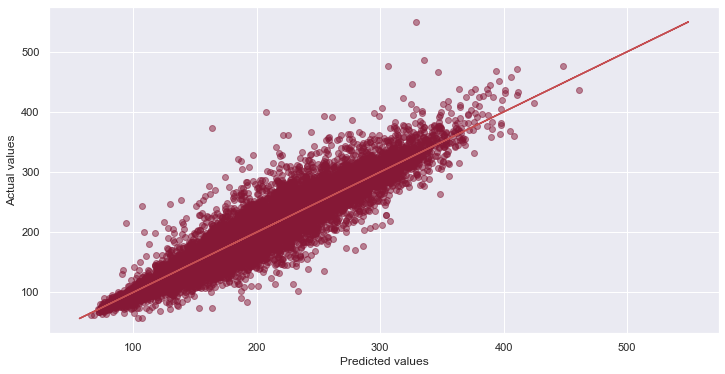

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Assuming y_pred and y_actual are numpy arrays or pandas Series
plt.scatter(pred_rand_for, y_test.values, alpha=0.5) # Plot a scatter plot of y_pred vs. y_actual
plt.plot(y_test.values, y_test.values, c='r')
# Plot a line plot of y_actual vs. y_actual as a reference line
print("\t\t\t\tFlight Fare Predicted Vs Actual Flight Fare")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Build Random Forest using GridSearch CV

In [149]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [150]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [152]:
rf_Model = RandomForestRegressor()

In [153]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [154]:
rf_Grid.fit(X_train_pca, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.8s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56; total time=   1.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   2.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=72; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.8s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48; total time=   1.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56; total time=   1.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   2.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   2.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48; total time=   1.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   2.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=72; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.8s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48; total time=   1.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56; total time=   1.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=72; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [155]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 48}

In [156]:
print (f'Train Accuracy - : {rf_Grid.score(X_train_pca,y_train)}')
print (f'Test Accuracy - : {rf_Grid.score(X_test_pca,y_test)}')

Train Accuracy - : 0.2286921972768723
Test Accuracy - : 0.23148079989046788


In [ ]:
mse_lassocv_tune_best1 = mean_squared_error(y_test, pred_lassocv_tune_best1)

# 5. Decision Tree

In [149]:
# Importing and fitting the model using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

data_DT = DecisionTreeRegressor( max_depth = 5, random_state = 42)
data_DT.fit(X_train_pca,y_train)

# Calculating the score of the model using the test data
data_DT_pred = data_DT.predict(X_test_pca)

In [150]:
def reg_metrics(y_test, y_pred, X_train):
    from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score 

    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print(f"Mean absolute error :{mae}\nMean squared error :{mse}\nRMSE:{rmse}\nR2 score: {r2}\nAdjusted R2 score: {adj_r_sq}")
reg_metrics(y_test, data_DT_pred, X_train_pca)

Mean absolute error :38.54995089530645
Mean squared error :2384.990652867736
RMSE:48.83636608991026
R2 score: 0.358828568005496
Adjusted R2 score: 0.35861881942974305


In [151]:
mape_DT = mean_absolute_percentage_error(y_test,data_DT_pred)

In [152]:
print('MAPE :',mape_rand_for)

MAPE : 0.07077416867539449


# Hyperparameter tuning of Lasso using GridSearchCV

In [153]:
from sklearn.model_selection import GridSearchCV

lasso_gscv=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor_gscv = GridSearchCV(lasso_gscv,parameters,cv=5, return_train_score=False)

lasso_regressor_gscv.fit(X_train_pca,y_train)
alpha =lasso_regressor_gscv.best_params_

print('Best parameter:', alpha)
print('Best score:', lasso_regressor_gscv.best_score_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.256e+07, tolerance: 2.586e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.338e+07, tolerance: 2.592e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.982e+07, tolerance: 2.596e

Best parameter: {'alpha': 1e-15}
Best score: 0.27357716865182546


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+08, tolerance: 3.242e+04
  model = cd_fast.enet_coordinate_descent(


In [155]:
# lasso_tune = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

lasso_clf = GridSearchCV(Lasso(random_state=0, max_iter=10000), tuned_parameters, cv=n_folds, refit=False)
lasso_clf.fit(X_train_pca, y_train)

best_tune_alpha_lasso = lasso_clf.best_params_
print('Best parameter:',best_tune_alpha_lasso)
print('Best score:',lasso_clf.best_score_)

Best parameter: {'alpha': 0.0001}
Best score: 0.27357716849683494


# Hyperparameter tuning using LassoCV

In [156]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

alphas = np.linspace(0.01, 1, 100)
k_fold = KFold(3)
ls_cv_m=LassoCV(alphas=alphas,cv= k_fold, max_iter=10000, n_jobs=1,verbose=True,random_state=100).fit(X_train_pca,y_train)
#lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)

# Get the best alpha parameter
best_tune_alpha_lassocv = ls_cv_m.alpha_
print('Best alpha :', best_tune_alpha_lassocv)
best_score_tune_lassocv = ls_cv_m.score(X_train_pca, y_train)
print('Best score :', best_score_tune_lassocv)

pred_lassocv_tune_best = ls_cv_m.predict(X_test_pca)

# Calculate the evaluation metrics
mse_lassocv_tune_best = mean_squared_error(y_test, pred_lassocv_tune_best)
rmse_lassocv_tune_best = np.sqrt(mse_lassocv_tune_best)
r2_lassocv_tune_best = r2_score(y_test, pred_lassocv_tune_best)
mae_lassocv_tune_best = mean_absolute_error(y_test,pred_lassocv_tune_best )
print('MSE: ',mse_lassocv_tune_best)
print('RMSE: ',rmse_lassocv_tune_best)
print('R2: ',r2_lassocv_tune_best)
print('MAE :',mae_lassocv_tune_best)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
................................................................................................................................................................................................................................................................................................

Best alpha : 0.01
Best score : 0.2737175797978978
MSE:  2642.3226405332557
RMSE:  51.40352751060238
R2:  0.2896484566154983
MAE : 40.874372304357


............[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


In [147]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

alphas = np.random.uniform(0.001, 1, 50)
k_fold = KFold(3)
ls_cv_m1=LassoCV(alphas=alphas,cv= k_fold, max_iter=10000, n_jobs=1,verbose=True,random_state=100).fit(X_train_pca,y_train)
#lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)

# Get the best alpha parameter
best_tune_alpha_lassocv = ls_cv_m1.alpha_
print('Best alpha :', best_tune_alpha_lassocv)
best_score_tune_lassocv = ls_cv_m1.score(X_train_pca, y_train)
print('Best score :', best_score_tune_lassocv)

pred_lassocv_tune_best1 = ls_cv_m1.predict(X_test_pca)

# Calculate the evaluation metrics
mse_lassocv_tune_best1 = mean_squared_error(y_test, pred_lassocv_tune_best1)
rmse_lassocv_tune_best1 = np.sqrt(mse_lassocv_tune_best1)
r2_lassocv_tune_best1 = r2_score(y_test, pred_lassocv_tune_best1)
mae_lassocv_tune_best1 = mean_absolute_error(y_test,pred_lassocv_tune_best1 )
print('MSE: ',mse_lassocv_tune_best1)
print('RMSE: ',rmse_lassocv_tune_best1)
print('R2: ',r2_lassocv_tune_best1)
print('MAE :',mae_lassocv_tune_best1)

Best alpha : 0.00710881509962603
Best score : 0.0810181043290551
MSE:  3396.654249563194
RMSE:  58.280822313718204
R2:  0.08685693733684152
MAE : 46.990813249103454


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
......................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [157]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

alphas = np.geomspace(0.0001, 1, 100)
k_fold = KFold(3)
ls_cv_m2=LassoCV(alphas=alphas,cv= k_fold, max_iter=10000, n_jobs=1,verbose=True,random_state=100).fit(X_train_pca,y_train)
#lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)

# Get the best alpha parameter
best_tune_alpha_lassocv = ls_cv_m2.alpha_
print('Best alpha :', best_tune_alpha_lassocv)
best_score_tune_lassocv = ls_cv_m2.score(X_train_pca, y_train)
print('Best score :', best_score_tune_lassocv)

pred_lassocv_tune_best2 = ls_cv_m2.predict(X_test_pca)

# Calculate the evaluation metrics
mse_lassocv_tune_best2 = mean_squared_error(y_test, pred_lassocv_tune_best2)
rmse_lassocv_tune_best2 = np.sqrt(mse_lassocv_tune_best2)
r2_lassocv_tune_best2 = r2_score(y_test, pred_lassocv_tune_best2)
mae_lassocv_tune_best2 = mean_absolute_error(y_test,pred_lassocv_tune_best2 )
print('MSE: ',mse_lassocv_tune_best2)
print('RMSE: ',rmse_lassocv_tune_best2)
print('R2: ',r2_lassocv_tune_best2)
print('MAE :',mae_lassocv_tune_best2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished


Best alpha : 0.0001
Best score : 0.273717619151731
MSE:  2642.3129010866764
RMSE:  51.403432775318386
R2:  0.2896510749297053
MAE : 40.873966569353634


# 6. Gradient Boosting regression

# Using Grid Search

In [158]:
GBR=GradientBoostingRegressor()
search_grid = {
    'n_estimators': [500],
    'learning_rate': [.1,.01,.03, .001], 
    'max_depth': [3],
    'criterion': ['squared_error', 'friedman_mse'],
    'loss': ['squared_error']
}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
search.fit(X,y.to_numpy().reshape((y.size)))
search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'n_estimators': 500}

In [159]:
search.best_score_

-892.3257492917022

In [160]:
search.cv_results_

{'mean_fit_time': array([ 276.55759907,  382.23212638,  532.64377246, 1015.15633879,
         959.63649039,  318.00798926,  338.49184661,  355.1243875 ]),
 'std_fit_time': array([  4.17720094, 123.50491193,   2.86069609, 237.53621005,
        330.02484395,   4.08921909,  15.47349205,   4.83617952]),
 'mean_score_time': array([0.70807047, 0.73810797, 0.69525833, 0.71353431, 0.64345732,
        1.31116099, 0.97096057, 0.64090023]),
 'std_score_time': array([0.02678865, 0.03076133, 0.01499501, 0.039403  , 0.03535368,
        0.28548734, 0.06721565, 0.22940289]),
 'param_criterion': masked_array(data=['squared_error', 'squared_error', 'squared_error',
                    'squared_error', 'friedman_mse', 'friedman_mse',
                    'friedman_mse', 'friedman_mse'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.01, 0.03, 0.001, 0.1, 0.01, 0.03, 0.001],
 

In [161]:
df_cv = pd.DataFrame(search.cv_results_)

In [162]:
# Get the best parameters and print them
best_params = search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 500}


In [347]:
# trying different hyperparameters
best_param_gridSearch = {
 'criterion': 'friedman_mse', 
 'learning_rate': 0.03, 
 'loss': 'squared_error', 
 'max_depth': 3, 
 'n_estimators': 500
}

In [348]:
best_param_gridSearch_GBR = GradientBoostingRegressor(**best_param_gridSearch)
best_param_gridSearch_GBR.fit(X_train_pca, y_train)

GradientBoostingRegressor(learning_rate=0.03, n_estimators=500)

In [349]:
y_pred_best_param_gridSearchGBR = best_param_gridSearch_GBR.predict(X_test_pca)

In [350]:
# Calculate the evaluation metrics

mse_gb1 = mean_squared_error(y_test, y_pred_best_param_gridSearchGBR)
rmse_gb1 = np.sqrt(mse_gb1)
r2_gb1 = r2_score(y_test, y_pred_best_param_gridSearchGBR)
mae_gb1 = mean_absolute_error(y_test,y_pred_best_param_gridSearchGBR )
mape_gb1 = mean_absolute_percentage_error(y_test, y_pred_best_param_gridSearchGBR)
#print evaluation metrics
print("Error metrics with the best hyperparameters found from GridSearch")
print("MSE is:\t\t",mse_gb1)
print("RMSE is:\t", rmse_gb1)
print("r2 is:\t\t",r2_gb1)
print("MAE is:\t\t",mae_gb1)
print("MAPE is:\t",mape_gb1)

Error metrics with the best hyperparameters found from GridSearch
MSE is:		 1969.5780257406504
RMSE is:	 44.37992818539312
r2 is:		 0.47050645180911166
MAE is:		 34.34296689089101
MAPE is:	 0.1985470377085468


In [ ]:
## with best parameters obtained from the code

In [163]:
best_param1_gridSearch = {
 'criterion': 'squared_error', 
 'learning_rate': 0.1, 
 'loss': 'squared_error', 
 'max_depth': 3, 
 'n_estimators': 500
}

In [164]:
best_param_gridSearch_GBR1 = GradientBoostingRegressor(**best_param1_gridSearch)
best_param_gridSearch_GBR1.fit(X_train_pca, y_train)

GradientBoostingRegressor(criterion='squared_error', n_estimators=500)

In [165]:
y_pred_best_param_gridSearchGBR1 = best_param_gridSearch_GBR1.predict(X_test_pca)

In [167]:
# Calculate the evaluation metrics

mse_gb_best_param_gs = mean_squared_error(y_test, y_pred_best_param_gridSearchGBR1)
rmse_gb_best_param_gs = np.sqrt(mse_gb_best_param_gs)
r2_gb_best_param_gs = r2_score(y_test, y_pred_best_param_gridSearchGBR1)
mae_gb_best_param_gs = mean_absolute_error(y_test,y_pred_best_param_gridSearchGBR1 )
mape_gb_best_param_gs = mean_absolute_percentage_error(y_test, y_pred_best_param_gridSearchGBR1)
#print evaluation metrics
print("Error metrics with the best hyperparameters found from GridSearch")
print("MSE is:\t\t",mse_gb_best_param_gs)
print("RMSE is:\t", rmse_gb_best_param_gs)
print("r2 is:\t\t",r2_gb_best_param_gs)
print("MAE is:\t\t",mae_gb_best_param_gs)
print("MAPE is:\t",mape_gb_best_param_gs)

Error metrics with the best hyperparameters found from GridSearch
MSE is:		 1263.5684670898859
RMSE is:	 35.54670824548858
r2 is:		 0.6603072626330952
MAE is:		 27.37178535651121
MAPE is:	 0.15204484732771947


# Using Randomized Search CV

In [168]:
rs_GBR = GradientBoostingRegressor()

# define the parameter distributions for the random search
param_dist = {
    'n_estimators': np.random.randint(500, 700, 2),
    'learning_rate': np.random.uniform(0.001, 0.1, 2),
    'max_depth': np.random.randint(3, 6, 2),
    'criterion': [ 'friedman_mse'],
    'loss': ['squared_error']
}

randomSearch = RandomizedSearchCV(estimator=rs_GBR, 
                            param_distributions=param_dist, 
                            n_iter=10, # number of random samples to try
                            cv=5, 
                            n_jobs=-1, 
                            scoring='neg_mean_squared_error', 
                            verbose=3)


In [3]:

randomSearch.fit(X_train_pca, y_train) # X_train and y_train are your training data

print("Best parameters: ", randomSearch.best_params_)
print("Best score: ", randomSearch.best_score_)

'''
Output was:
Best parameters:  {'n_estimators': 638, 'max_depth': 5, 'loss': 'squared_error', 'learning_rate': 0.06626196477894054, 'criterion': 'friedman_mse'}
'''

In [178]:
# Result of best random search

best_param1_randomSearch = {
    'n_estimators': 638,
    'max_depth': 5, 
    'loss': 'squared_error',
    'learning_rate': 0.06626196477894054,
    'criterion': 'friedman_mse'
}

In [179]:
best_param_randomSearch_GBR1 = GradientBoostingRegressor(**best_param1_randomSearch)
best_param_randomSearch_GBR1.fit(X_train_pca, y_train)

GradientBoostingRegressor(learning_rate=0.06626196477894054, max_depth=5,
                          n_estimators=638)

In [180]:
## predict on test data
y_pred_best_param_randomSearchGBR1 = best_param_randomSearch_GBR1.predict(X_test_pca)
y_pred_best_param_randomSearchGBR1

array([192.59111417, 180.88280507, 180.34782216, ..., 144.41510538,
       243.31780061, 212.31559157])

In [181]:
# Calculate the evaluation metrics

mse_gb_best_param_rs = mean_squared_error(y_test, y_pred_best_param_randomSearchGBR1)
rmse_gb_best_param_rs = np.sqrt(mse_gb_best_param_rs)
r2_gb_best_param_rs = r2_score(y_test, y_pred_best_param_randomSearchGBR1)
mae_gb_best_param_rs = mean_absolute_error(y_test,y_pred_best_param_randomSearchGBR1)
mape_gb_best_param_rs = mean_absolute_percentage_error(y_test, y_pred_best_param_randomSearchGBR1)
#print evaluation metrics

print("Error metrics with the best hyperparameters found from RandomSearch")
print("MSE is:\t\t",mse_gb_best_param_rs)
print("RMSE is:\t", rmse_gb_best_param_rs)
print("r2 is:\t\t",r2_gb_best_param_rs)
print("MAE is:\t\t",mae_gb_best_param_rs)
print("MAPE is:\t",mape_gb_best_param_rs)

Error metrics with the best hyperparameters found from RandomSearch
MSE is:		 766.341720771776
RMSE is:	 27.682877754521403
r2 is:		 0.7939797298938844
MAE is:		 20.923412946631995
MAPE is:	 0.1147487418125146


In [ ]:
# Another paramters error metrics testing

In [182]:
# Result of previous random search

best_param_randomSearch = {
    'n_estimators': 638,
    'max_depth': 3, 
    'loss': 'squared_error',
    'learning_rate': 0.05362139859971872,
    'criterion': 'friedman_mse'
}

In [183]:
best_param_randomSearch_GBR = GradientBoostingRegressor(**best_param_randomSearch)
best_param_randomSearch_GBR.fit(X_train_pca, y_train)

GradientBoostingRegressor(learning_rate=0.05362139859971872, n_estimators=638)

In [184]:
## predict on test data
y_pred_best_param_randomSearchGBR = best_param_randomSearch_GBR.predict(X_test_pca)
y_pred_best_param_randomSearchGBR

array([183.16840187, 194.19541941, 191.30863003, ..., 131.31876871,
       214.95693334, 204.98946282])

In [185]:
# Calculate the evaluation metrics

mse_gb2 = mean_squared_error(y_test, y_pred_best_param_randomSearchGBR)
rmse_gb2 = np.sqrt(mse_gb2)
r2_gb2 = r2_score(y_test, y_pred_best_param_randomSearchGBR)
mae_gb2 = mean_absolute_error(y_test,y_pred_best_param_randomSearchGBR )
mape_gb2 = mean_absolute_percentage_error(y_test, y_pred_best_param_randomSearchGBR)
#print evaluation metrics

print("Error metrics with the best hyperparameters found from RandomSearch")
print("MSE is:\t\t",mse_gb2)
print("RMSE is:\t", rmse_gb2)
print("r2 is:\t\t",r2_gb2)
print("MAE is:\t\t",mae_gb2)
print("MAPE is:\t",mape_gb2)

Error metrics with the best hyperparameters found from RandomSearch
MSE is:		 1407.0311230180055
RMSE is:	 37.510413527685955
r2 is:		 0.6217393309606736
MAE is:		 29.009387531472484
MAPE is:	 0.16149671487120024


# Default hyperparameter tuning

In [186]:
reg = GradientBoostingRegressor()

In [187]:
reg.fit(X_train_pca, y_train)

GradientBoostingRegressor()

In [188]:
y_pred_WithoutTuning = reg.predict(X_test_pca)

In [189]:
mse_gb3 = mean_squared_error(y_test, y_pred_WithoutTuning)
rmse_gb3 = np.sqrt(mse_gb3)
r2_gb3 = r2_score(y_test, y_pred_WithoutTuning)
mae_gb3 = mean_absolute_error(y_test,y_pred_WithoutTuning )
mape_gb3 = mean_absolute_percentage_error(y_test, y_pred_WithoutTuning)
#print evaluation metrics

print("Error metrics with the best hyperparameters with Default Hyperparameter Tuning")
print("MSE is:\t\t", mse_gb3)
print("RMSE is:\t", rmse_gb3)
print("r2 is:\t\t",r2_gb3)
print("MAE is:\t\t",mae_gb3)
print("MAPE is:\t",mape_gb3)

Error metrics with the best hyperparameters with Default Hyperparameter Tuning
MSE is:		 1823.9648300796791
RMSE is:	 42.70790126053584
r2 is:		 0.5096525260576543
MAE is:		 33.49217387681701
MAPE is:	 0.18834159172234774


# 7. HISTOGRAM

In [190]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [191]:
from sklearn.ensemble import HistGradientBoostingRegressor
est = HistGradientBoostingRegressor().fit(X_train_pca, y_train)
est.score(X_train_pca, y_train)

0.6993429223003013

In [192]:
##predict 
y_pred_hg = est.predict(X_test_pca)
y_pred_hg

array([183.21424191, 206.1254803 , 207.42582529, ..., 142.40787808,
       221.4679928 , 208.95585789])

In [193]:
# Calculate the evaluation metrics
mse_hg_1 = mean_squared_error(y_test, y_pred_hg)
rmse_hg_1 = np.sqrt(mse_hg_1)
r2_hg_1 = r2_score(y_test, y_pred_hg)
mae_hg_1 = mean_absolute_error(y_test,y_pred_hg )
mape_hg_1 = mean_absolute_percentage_error(y_test, y_pred_hg)
print(mse_hg_1)
print(rmse_hg_1)
print(r2_hg_1)
print(mae_hg_1)
print(mape_hg_1)

1154.486221176513
33.97773125410985
0.6896325011757943
26.168340438839195
0.1451226969281029


## Hyperparatmer

In [194]:
# Define the hyperparameters to tune
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5],
          'min_samples_leaf': [1, 5],
          'max_leaf_nodes': [None, 10]}

# Define the grid search with 5-fold cross-validation
grid_search = GridSearchCV(est, param_grid=params, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best hyperparameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1}
Best score:  0.7335648730181952


In [198]:
best_param_Search_HBR = HistGradientBoostingRegressor(**grid_search.best_params_)
best_param_Search_HBR.fit(X_train_pca, y_train)

HistGradientBoostingRegressor(max_depth=5, max_leaf_nodes=None,
                              min_samples_leaf=1)

In [199]:
## predict on test data
y_pred_best_param_randomSearchHBR = best_param_Search_HBR.predict(X_test_pca)
y_pred_best_param_randomSearchHBR

array([175.08994254, 202.75396332, 203.08311197, ..., 136.39515885,
       219.44177203, 207.54837517])

In [201]:
est = HistGradientBoostingRegressor(learning_rate = 0.3, max_depth= 5, max_leaf_nodes= None, min_samples_leaf= 1).fit(X_train_pca,y_train)
y_pred_hg = est.predict(X_test_pca)
# Calculate the evaluation metrics
mse_hg = mean_squared_error(y_test, y_pred_best_param_randomSearchHBR)
rmse_hg = np.sqrt(mse_hg)
r2_hg = r2_score(y_test, y_pred_hg)
mae_hg = mean_absolute_error(y_test,y_pred_best_param_randomSearchHBR )
print(mse_hg)
print(rmse_hg)
print(r2_hg)
print(mae_hg)

1313.505768288566
36.24232012838811
0.7535035422326178
28.000738497506738


## Stage 5: Evaluation

In [ ]:
## Best Model- Random Forest Regressor
## MSE:  379.48952321087125
## RMSE:  19.480490835984376
## R2:  0.8979795410386795
## MAE : 13.38159987386714
## MAPE : 0.07089020961905614

## Stage 6: Deployment

In [66]:
import pickle
def pickle_data(data, fileName):
    pickle.dump(data, open("C:\\ML  model deployment\\" + fileName, "wb"))

In [ ]:
# USA Flight Fare Prediction website
# Running on http://127.0.0.1:5000